In [3]:
import pandas as pd

# Load the CSV file to inspect the data
data_path = r"C:\Users\chris\Downloads\School\MSU\CMSE 820 Mathematical Foundations of Data Science\HW8data.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the data along with column information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   Label   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


(         X1        X2  Label
 0  2.376568  0.116732      1
 1  0.341607  1.892330      1
 2  1.722246  3.068889      1
 3  1.017494  1.020899      1
 4  1.914570  3.368180      1,
 None)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


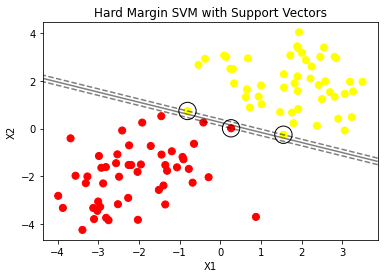

In [4]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Initialize a hard margin SVM model
svm_hard = SVC(kernel='linear', C=float('inf'))  # High C value to enforce hard margin

# Fit SVM to the data
X = data[['X1', 'X2']]
y = data['Label']
svm_hard.fit(X, y)

# Plotting the data and the decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plot initial data
plt.scatter(X['X1'], X['X2'], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm_hard)
plt.title("Hard Margin SVM with Support Vectors")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [8]:
def plot_svc_decision_function(model, X, y, title="SVM Decision Boundary", label="Support Vectors"):
    plt.scatter(X['X1'], X['X2'], c=y, s=50, cmap='autumn', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='blue')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [ ]:
# Change the label of the second row to -1
data.at[1, 'Label'] = -1
y_modified = data['Label']

# Initialize a new hard margin SVM model with updated data
svm_hard_modified = SVC(kernel='linear', C=float('inf'))  # High C value for hard margin

# Fit the modified SVM to the data
svm_hard_modified.fit(X, y_modified)

# Plot the decision boundary for the modified data
plot_svc_decision_function(svm_hard_modified, X, y_modified, "Hard Margin SVM (Modified Label)")

C:\Users\chris\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


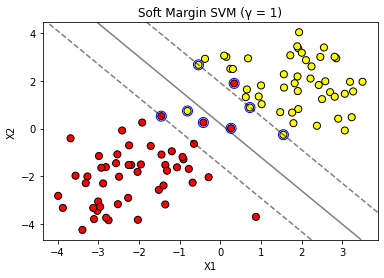

In [9]:
# Change the label of the second row to -1
data.at[1, 'Label'] = -1
y_modified = data['Label']

# Initialize a soft margin SVM model with C = 1
svm_soft = SVC(kernel='linear', C=1)  # Soft margin with C = 1

# Fit the soft margin SVM to the modified data
svm_soft.fit(X, y_modified)

# Plot the decision boundary for the soft margin SVM
plot_svc_decision_function(svm_soft, X, y_modified, "Soft Margin SVM (γ = 1)")

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Change the label of the second row to -1
data.at[1, 'Label'] = -1

# Initialize a new hard margin SVM model
svm_hard_modified = SVC(kernel='linear', C=float('inf'))  # High C value for hard margin

# Fit the modified SVM to the data
X_modified = data[['X1', 'X2']]
y_modified = data['Label']
svm_hard_modified.fit(X_modified, y_modified)

# Function to plot SVM decision boundary and support vectors
def plot_svc_decision_function(model, X, y, title="SVM Decision Boundary", label="Support Vectors"):
    plt.scatter(X['X1'], X['X2'], c=y, s=50, cmap='autumn', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='blue')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

# Plot the decision boundary for the modified data
plot_svc_decision_function(svm_hard_modified, X_modified, y_modified, "Hard Margin SVM (Modified Label)")
# Initialize a soft margin SVM model with C = 1
svm_soft = SVC(kernel='linear', C=1)  # Soft margin with C = 1

# Fit the soft margin SVM to the modified data
svm_soft.fit(X_modified, y_modified)

# Plot the decision boundary for the soft margin SVM
plot_svc_decision_function(svm_soft, X_modified, y_modified, "Soft Margin SVM (γ = 1)", "Soft Margin Support Vectors")
